# EE4C12-Epileptic-Seizure-Detection-using-EEG


    
Group 16 Members:

    1. Zhixuan Ge  
    2. Yanqi Hong 

## 1. Program Preparation

### 1.1 Import Packages

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, accuracy_score, roc_curve, precision_recall_curve, PrecisionRecallDisplay, roc_auc_score, RocCurveDisplay, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
import random
from kmeans_pytorch import kmeans, kmeans_predict
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# from sklearn.utils.validation import check_missing_values
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
# from sklearn.datasets import make_classification
# from collections import Counter

import torch
from torch import nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
device = "cuda"
#device = "cpu"

In [2]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

### 1.2 Import Data

In [3]:
#load data on Yanqi Hong's computer
data = pd.read_csv('E:\DATA\TUD\Master\TUD_Master_Y1\Q1\EE4C12 Machine Learning For Electrical Engineering\CodeLab\Project\S&S_SZD (1)\Data\Project_Data_EE4C12_S&S_SZD.csv')
data

,Patient,annotation,min|FP1-F7,min|F7-T3,min|T3-T5,min|T5-O1,min|FP2-F8,min|F8-T4,min|T4-T6,min|T6-O2,...,norm_power_HF|CZ-C4,norm_power_HF|C4-T4,norm_power_HF|FP1-F3,norm_power_HF|F3-C3,norm_power_HF|C3-P3,norm_power_HF|P3-O1,norm_power_HF|FP2-F4,norm_power_HF|F4-C4,norm_power_HF|C4-P4,norm_power_HF|P4-O2
0,258,1,50,61,57,53,39,35,39,35,...,0.016087,0.066920,0.102402,0.481384,0.690787,0.154544,0.062533,0.046460,0.066575,0.086999
1,258,1,48,62,60,46,38,35,39,33,...,0.024006,0.064857,0.031791,0.225788,0.409987,0.184671,0.071133,0.022369,0.079494,0.047536
2,258,1,51,60,59,45,38,36,40,36,...,0.037326,0.100177,0.050009,0.622584,0.394504,0.225516,0.050673,0.044906,0.102142,0.068105
3,258,1,49,58,56,42,36,36,41,37,...,0.027546,0.107883,0.014017,0.359140,0.276964,0.104977,0.018042,0.079467,0.078255,0.089385
4,258,1,45,57,61,41,35,37,41,37,...,0.036820,0.182520,0.031397,0.328354,0.156929,0.151952,0.047532,0.135071,0.098320,0.137701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55451,11580,-1,75,73,81,80,66,80,77,75,...,0.244334,0.625396,0.023821,0.058277,0.083594,0.114426,0.119654,0.295364,0.185930,0.199585
55452,11580,-1,74,74,77,71,79,75,82,77,...,0.588236,0.743060,0.076294,0.332341,0.228458,0.170603,0.351418,0.638666,0.490806,0.307429
55453,11580,-1,72,76,72,73,74,76,80,76,...,0.296041,0.770194,0.041190,0.090919,0.186074,0.216797,0.231053,0.770637,0.285257,0.413382
55454,11580,-1,77,82,74,75,82,85,80,76,...,0.440360,0.720855,0.026959,0.026340,0.077674,0.269610,0.186769,0.790173,0.473615,0.415771


In [83]:
# # load data on Zhixuan's computer
# data = pd.read_csv('D:\\User\Zhixuan Ge\Onedrive TUDelft\OneDrive - Delft University of Technology\Courses\ML for EE\SZD\S&S_SZD\Project_Data_EE4C12_S&S_SZD.csv')
# data

## 2. Data Preprocessing

### 2.1 Train-Test Split

In [4]:
# Not applied for the moment
# x is the features, y is the label
y = np.int32(data['annotation'].values)
X = data.iloc[:, 2:].values
patient_id = data.iloc[:, 0].values
patient_id_unique = np.unique(patient_id)
print(patient_id_unique)
print(len(patient_id_unique))

#split the data into training and testing
Shuffle_state = 42
test_size = 0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=Shuffle_state)

print(X_train.shape)
print(X_test.shape)

#pca
# from sklearn.decomposition import PCA
# pca = PCA(n_components=2)
# pca.fit(X_train)
# X_train =pca.transform(X_train)
# X_test =pca.transform(X_test)
# print(X_train.shape)
# print(X_test.shape)

#k fold cross validation

[  258  4456  5371  5804  6175  6514  6563  8889  9578 10020 10158 10418
 10591 11333 11580]
15
(41592, 360)
(13864, 360)


In [5]:
#k fold cross validation
def Kfold_split(X_train, y_train, Shuffle_state):   # Split the data into training and validation sets
    #example : X_k_train, y_k_train, X_k_val, y_k_val = Kfold_split(X_train, y_train, Shuffle_state)
    kf = KFold(n_splits=5, random_state=Shuffle_state, shuffle=True)
    kf.get_n_splits(X_train)
    X_k_train = []
    y_k_train = []
    X_k_val = []
    y_k_val = []
    for train_index, val_index in kf.split(X_train):  # Split the data into training and validation sets
        X_k_train.append(X_train[train_index])
        y_k_train.append(y_train[train_index])
        X_k_val.append(X_train[val_index])
        y_k_val.append(y_train[val_index])
    return X_k_train, y_k_train, X_k_val, y_k_val



### 2.2 Scaling

In [6]:

#standardize the data
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)



### 2.3 Feature Selection

(41592, 360)


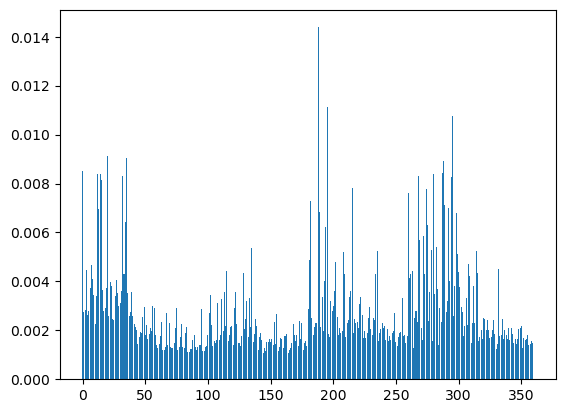

[164 144  84  85 146 156  96  97 140  64 165 176  76  91  65  87  86 330
 160 166  81 264  71  72 351  60 145  80 157  70  90  98  92  66  77 126
 104 251 179  99 172 284 152 120  93  59  68 356  94  61 154 357 331 346
  44 310 177 106  73 258 167 359 125 344 124 136 250 148 150 147 178 170
 244 279 116 358 316 105 236 242 246 341 353 271 143  88 109 107 159 319
 174 339 336 151 345  52 354 347 149 158 226 352 224 325 141 326  78  45
 132 197 317 252 210 245 161  62 162 333 304 259 127 256 204 338 100  89
 171  58 110 117 169 184  50 334 355 257 231 163  53 137 329 196 343 253
  82 227  47 247 237 216 206 142  46 254  55 225 248 112 192 207 327 322
 318  43 324 337 230 129 243 238 348 220 270 340  54 349 205 342 240  74
  83  42 134 185 118 190 139 241 350 305 119 114 103  51 307 123  10  79
  41 168 311 313 186 218  69 187 175 211 239 219 153 267 286  63 276 173
 328 323 212  25 233 217 138 335 321 130  24 320 265 232 183 228  48 203
  40  21 296  37   4 223 155  67 249 101   1 303  3

In [7]:
print(X_train_scaled.shape)
clf_etc = ExtraTreesClassifier(random_state=Shuffle_state).fit(X_train_scaled, y_train)
# y_pred = clf_etc.predict(X_test)
feature_importances = clf_etc.feature_importances_
plt.bar(range(len(feature_importances)), feature_importances)
plt.show()
important_feature_indices=np.argsort(feature_importances)
print(important_feature_indices)
# for i in range(0,len(important_feature_indices)):
#     X_train_scaled[important_feature_indices[i]]= X_train_scaled[important_feature_indices[i]]**(100*feature_importances[important_feature_indices[i]])
#     X_test_scaled[important_feature_indices[i]]= X_test_scaled[important_feature_indices[i]]**(100*feature_importances[important_feature_indices[i]])
    
important_feature_indices_cut=important_feature_indices[:int(len(important_feature_indices)/1.5)]
print(important_feature_indices_cut)

X_train_scaled=np.delete(X_train_scaled,important_feature_indices_cut,1)
X_test_scaled=np.delete(X_test_scaled,important_feature_indices_cut,1)
print(X_train_scaled.shape)
print(X_test_scaled.shape)

### 2.4 Oversampling and Undersampling

In [8]:
num_zero=np.sum(y_train==0)
num_one=np.sum(y_train==1)
num_negatives_one=np.sum(y_train==-1)
print('The number of 0 is', num_zero)
print('The number of 1 is', num_one)
print('The number of -1 is', num_negatives_one)

#undersampling
# from imblearn.under_sampling import RandomUnderSampler
# rus = RandomUnderSampler(random_state=Shuffle_state)
# X_train, y_train = rus.fit_resample(X_train, y_train)

# oversampling
sm = SMOTE(random_state=Shuffle_state)
X_train_scaled, y_train = sm.fit_resample(X_train_scaled, y_train)

#Combination of over- and under-sampling
# smt = SMOTETomek(random_state=Shuffle_state)
# X_train_scaled, y_train = smt.fit_resample(X_train_scaled, y_train)

num_zero=np.sum(y_train==0)
num_one=np.sum(y_train==1)
num_negatives_one=np.sum(y_train==-1)

print('The number of 0 is', num_zero)
print('The number of 1 is', num_one)
print('The number of -1 is', num_negatives_one)

The number of 0 is 1469
The number of 1 is 18177
The number of -1 is 21946
The number of 0 is 21946
The number of 1 is 21946
The number of -1 is 21946


In [95]:
y = np.int32(data['annotation'].values)
X = data.iloc[:, 2:].values

scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [96]:
n_p = data['annotation'].value_counts()[1]
n_n = data['annotation'].value_counts()[-1]
n_z = data['annotation'].value_counts()[0]

weights = np.array([n_n, n_z, n_p])
weights = weights / weights.sum()
weights = 1 / weights
weights = weights / weights.sum()

weights = {-1:weights[0], 0:weights[1], 1:weights[2]}

print(weights)

{-1: 0.05863727895765303, 0: 0.8704602962506767, 1: 0.07090242479167017}


## 3. Model Training

### 3.1 Try 1: logistic regression

In [ ]:
#Logistic regression
clf_lr = LogisticRegression(max_iter=1000, class_weight=weights).fit(X_train, y_train)
y_pred = clf_lr.predict(X_test)

NameError: name 'weights' is not defined

In [ ]:
#Performance metrics
Accuracy_LR = accuracy_score(y_test, y_pred)
F1_LR = accuracy_score(y_test, y_pred)
Precision_LR = accuracy_score(y_test, y_pred)
Recall_LR = accuracy_score(y_test, y_pred)
print("Accuracy: " + str(Accuracy_LR))
print("F1 score: " + str(F1_LR))
print("Recall score: " + str(Recall_LR))
print("Precision score: " + str(Precision_LR))

Accuracy: 0.4337132140796307
F1 score: 0.4337132140796307
Recall score: 0.4337132140796307
Precision score: 0.4337132140796307


In [ ]:
# not possible for multi-classification
'''#ROC curve

y_score_train = clf_lr.decision_function(X_train)
y_score_test = clf_lr.decision_function(X_test)
fpr_train, tpr_train, _ = roc_curve(y_train, y_score_train, pos_label=clf_lr.classes_[1])
fpr_test, tpr_test, _ = roc_curve(y_test, y_score_test, pos_label=clf_lr.classes_[1])

ax = plt.gca()
train_disp = RocCurveDisplay(fpr=fpr_train, tpr=tpr_train)
train_disp.plot(ax, name='Train')

test_disp = RocCurveDisplay(fpr=fpr_test, tpr=tpr_test)
test_disp.plot(ax, name='Test')

plt.legend()
plt.show()'''

"#ROC curve\n\ny_score_train = clf_lr.decision_function(X_train)\ny_score_test = clf_lr.decision_function(X_test)\nfpr_train, tpr_train, _ = roc_curve(y_train, y_score_train, pos_label=clf_lr.classes_[1])\nfpr_test, tpr_test, _ = roc_curve(y_test, y_score_test, pos_label=clf_lr.classes_[1])\n\nax = plt.gca()\ntrain_disp = RocCurveDisplay(fpr=fpr_train, tpr=tpr_train)\ntrain_disp.plot(ax, name='Train')\n\ntest_disp = RocCurveDisplay(fpr=fpr_test, tpr=tpr_test)\ntest_disp.plot(ax, name='Test')\n\nplt.legend()\nplt.show()"

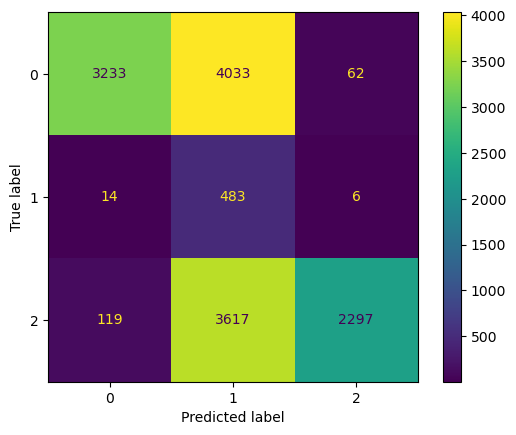

In [ ]:
#Confusion Matrix
cm_2c = confusion_matrix(y_test, y_pred)
cm_display_2c = ConfusionMatrixDisplay(cm_2c).plot()
plt.show()

In [ ]:
clf_svm = svm.SVC(kernel='linear', max_iter=2000,random_state=Shuffle_state, verbose=1, class_weight=weights).fit(X_train, y_train)
y_pred = clf_svm.predict(X_test)

ValueError: Found input variables with inconsistent numbers of samples: [41592, 65684]

In [ ]:
#Performance metrics
Accuracy_LR = accuracy_score(y_test, y_pred)
F1_LR = accuracy_score(y_test, y_pred)
Precision_LR = accuracy_score(y_test, y_pred)
Recall_LR = accuracy_score(y_test, y_pred)
print("Accuracy: " + str(Accuracy_LR))
print("F1 score: " + str(F1_LR))
print("Recall score: " + str(Recall_LR))
print("Precision score: " + str(Precision_LR))

Accuracy: 0.407530294287363
F1 score: 0.407530294287363
Recall score: 0.407530294287363
Precision score: 0.407530294287363


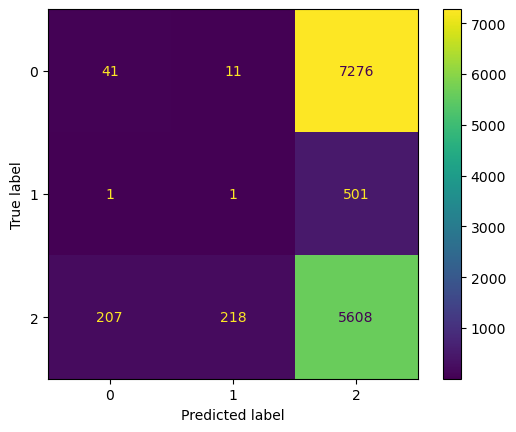

In [ ]:
#Confusion Matrix
cm_2c = confusion_matrix(y_test, y_pred)
cm_display_2c = ConfusionMatrixDisplay(cm_2c).plot()
plt.show()

### 3.2 Try 2: mlp (sklearn)


In [ ]:
# hl_size = (128, 64,64)
# #hl_size = (256, 256, 256, 128, 64)
# clf_mlp = MLPClassifier(hidden_layer_sizes=hl_size, activation='relu', solver='adam',
#                         alpha=0.0001, max_iter=1000, shuffle=True, random_state=Shuffle_state, verbose=True)
# clf_mlp.fit(X_train_scaled, y_train)
# y_pred = clf_mlp.predict(X_test_scaled)

mlp = MLPClassifier()

param_dist = {"hidden_layer_sizes": [(50,), (100,), (150,), (200,)],
              "activation": ["logistic", "tanh", "relu"],
              "solver": ["sgd", "adam"],
              "alpha": [0.0001, 0.001, 0.01],
              "learning_rate": ["constant", "adaptive"]}

# run randomized search
n_iter_search = 10
random_search = RandomizedSearchCV(mlp, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5, verbose=2, n_jobs=8)
random_search.fit(X_train_scaled, y_train)
y_pred = random_search.predict(X_test_scaled)

print(random_search.best_params_)
print("Best score:", random_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
#Performance metrics
Accuracy_LR = accuracy_score(y_test, y_pred)
F1_LR = accuracy_score(y_test, y_pred)
Precision_LR = accuracy_score(y_test, y_pred)
Recall_LR = accuracy_score(y_test, y_pred)
print("Accuracy: " + str(Accuracy_LR))
print("F1 score: " + str(F1_LR))
print("Recall score: " + str(Recall_LR))
print("Precision score: " + str(Precision_LR))

Accuracy: 0.8711771494518177
F1 score: 0.8711771494518177
Recall score: 0.8711771494518177
Precision score: 0.8711771494518177


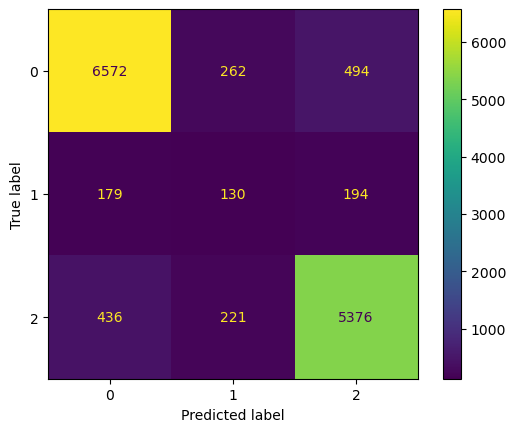

503
6033
7328


In [ ]:
#Confusion Matrix
cm_2c = confusion_matrix(y_test, y_pred)
cm_display_2c = ConfusionMatrixDisplay(cm_2c).plot()
plt.show()


### 3.3 Try 3: Random Forest

In [ ]:
rf = RandomForestClassifier()


param_dist = {"max_depth": [3, None],
              "max_features": np.arange(1, 10),
              "min_samples_split": np.arange(2, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy", "log_loss"]}

# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(rf, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5, verbose=3, n_jobs=8)

random_search.fit(X_train_scaled, y_train)
y_pred = random_search.predict(X_test_scaled)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [ ]:
#Performance metrics
Accuracy_LR = accuracy_score(y_test, y_pred)
F1_LR = accuracy_score(y_test, y_pred)
Precision_LR = accuracy_score(y_test, y_pred)
Recall_LR = accuracy_score(y_test, y_pred)
print("Accuracy: " + str(Accuracy_LR))
print("F1 score: " + str(F1_LR))
print("Recall score: " + str(Recall_LR))
print("Precision score: " + str(Precision_LR))

Accuracy: 0.8868291979226774
F1 score: 0.8868291979226774
Recall score: 0.8868291979226774
Precision score: 0.8868291979226774


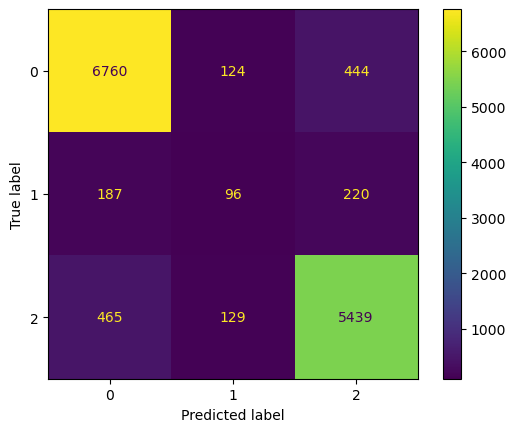

In [ ]:
#Confusion Matrix
cm_2c = confusion_matrix(y_test, y_pred)
cm_display_2c = ConfusionMatrixDisplay(cm_2c).plot()
plt.show()

### 3.4  Try 4: DNN (PyTorch)

In [9]:
# initialize the NN
class Data_tensor(Dataset):
    def __init__(self, X, y):
        X = np.float32(X)
        X = torch.from_numpy(X)
        y = np.longlong(y) - y.min()
        y = torch.from_numpy(y)
        
        self.X = X.to(device)
        self.y = y.to(device)
        
    def __len__(self):
        return self.X.shape[0]
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]
    


In [10]:
# DNN class for random search
class DNN_rs(nn.Module):
    # Available activation functions: ReLU, Sigmoid, Tanh, LeakyReLU, ELU, SELU, Softplus, Softsign, LogSigmoid, PReLU, Softmin, Softmax, if the input is not in the list, ReLU will be used
    def __init__(self, input_size, hidden_sizes, output_size, activition_layer=nn.ReLU()):
        super(DNN_rs, self).__init__()
        depth=len(hidden_sizes)
        layers = []
        for i in range(depth):
            if i == 0:
                layers.append(nn.Linear(input_size, hidden_sizes[i])) 
            else:
                layers.append(nn.Linear(hidden_sizes[i-1], hidden_sizes[i]))
            if activition_layer=="ReLU":
                layers.append(nn.ReLU())
            elif activition_layer=="Sigmoid":
                layers.append(nn.Sigmoid())
            elif activition_layer=="Tanh":
                layers.append(nn.Tanh())
            elif activition_layer=="LeakyReLU":
                layers.append(nn.LeakyReLU())
            elif activition_layer=="ELU":
                layers.append(nn.ELU())
            elif activition_layer=="SELU":
                layers.append(nn.SELU())
            elif activition_layer=="Softplus":
                layers.append(nn.Softplus())
            elif activition_layer=="Softsign":
                layers.append(nn.Softsign())
            elif activition_layer=="LogSigmoid":
                layers.append(nn.LogSigmoid())
            elif activition_layer=="PReLU":
                layers.append(nn.PReLU())
            elif activition_layer=="Softmin":
                layers.append(nn.Softmin())
            elif activition_layer=="Softmax":
                layers.append(nn.Softmax())
            else:
                layers.append(nn.ReLU())
        layers.append(nn.Linear( hidden_sizes[-1], output_size))
        self.linear_relu_stack = nn.Sequential(*layers)

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits


In [12]:
# Test output for DNN_rs
input_size = X_train_scaled.shape[1]
output_size = 3
model_rs = DNN_rs(input_size, hidden_sizes=[100], output_size=output_size, activition_layer="PReLU")
print(model_rs)

DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=120, out_features=100, bias=True)
    (1): PReLU(num_parameters=1)
    (2): Linear(in_features=100, out_features=3, bias=True)
  )
)


In [13]:
# DNN class for normal training hidden sizes are fixed (512,512)
class DNN(nn.Module):
    def __init__(self, input_size=512, output_size=10):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(input_size, 512),
            nn.LeakyReLU(),
            # nn.SELU(),
            # nn.Tanh(),
            nn.Linear(512, 512),
            nn.LeakyReLU(),
            # nn.SELU(),
            # nn.Tanh(),
            nn.Linear(512, output_size)
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits

model = DNN(X_train_scaled.shape[1], 3).to(device)
print(model)

DNN(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=120, out_features=512, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.01)
    (4): Linear(in_features=512, out_features=3, bias=True)
  )
)


In [14]:
# Train and test functions
def train(dataloader, model, loss_fn, optimizer):  
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        # print(pred.dtype)
        # print(y.dtype)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
            
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [15]:
# Define loss function and optimizer
loss_fn = nn.CrossEntropyLoss() # CrossEntropyLoss for multi-classification
optimizer = torch.optim.Adam(model.parameters(),weight_decay=0.005) # Adam optimizer for normal training
optimizer_rs = torch.optim.Adam(model_rs.parameters(),weight_decay=0.005)   # Adam optimizer for random search

####################
Fold 1
Epoch 1
-------------------------------
loss: 1.110724  [ 1024/52670]
Test Error: 
 Accuracy: 74.9%, Avg loss: 0.620394 

Epoch 2
-------------------------------
loss: 0.640400  [ 1024/52670]
Test Error: 
 Accuracy: 78.8%, Avg loss: 0.552847 

Epoch 3
-------------------------------
loss: 0.543060  [ 1024/52670]
Test Error: 
 Accuracy: 80.3%, Avg loss: 0.502927 

Epoch 4
-------------------------------
loss: 0.470392  [ 1024/52670]
Test Error: 
 Accuracy: 80.7%, Avg loss: 0.488366 

Epoch 5
-------------------------------
loss: 0.424537  [ 1024/52670]
Test Error: 
 Accuracy: 84.0%, Avg loss: 0.435234 

Epoch 6
-------------------------------
loss: 0.400683  [ 1024/52670]
Test Error: 
 Accuracy: 84.0%, Avg loss: 0.427594 

Epoch 7
-------------------------------
loss: 0.382026  [ 1024/52670]
Test Error: 
 Accuracy: 84.4%, Avg loss: 0.416195 

Epoch 8
-------------------------------
loss: 0.370391  [ 1024/52670]
Test Error: 
 Accuracy: 86.1%, Avg loss: 0.39000

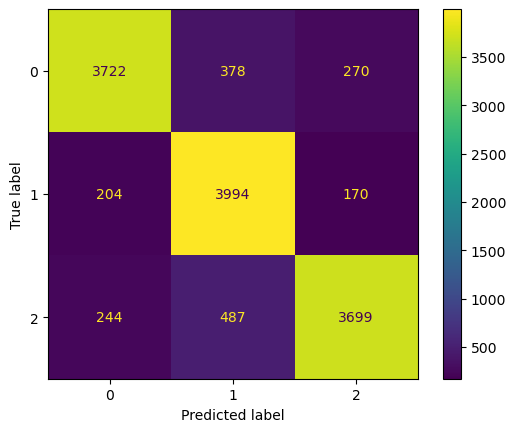

####################
####################
Fold 2
Epoch 1
-------------------------------
loss: 0.361837  [ 1024/52670]
Test Error: 
 Accuracy: 87.5%, Avg loss: 0.345285 

Epoch 2
-------------------------------
loss: 0.317028  [ 1024/52670]
Test Error: 
 Accuracy: 86.3%, Avg loss: 0.359993 

Epoch 3
-------------------------------
loss: 0.373958  [ 1024/52670]
Test Error: 
 Accuracy: 88.2%, Avg loss: 0.333931 

Epoch 4
-------------------------------
loss: 0.328164  [ 1024/52670]
Test Error: 
 Accuracy: 89.2%, Avg loss: 0.323724 

Epoch 5
-------------------------------
loss: 0.348293  [ 1024/52670]
Test Error: 
 Accuracy: 88.1%, Avg loss: 0.324940 

Epoch 6
-------------------------------
loss: 0.311280  [ 1024/52670]
Test Error: 
 Accuracy: 88.3%, Avg loss: 0.318615 

Epoch 7
-------------------------------
loss: 0.294996  [ 1024/52670]
Test Error: 
 Accuracy: 88.4%, Avg loss: 0.317952 

Epoch 8
-------------------------------
loss: 0.282353  [ 1024/52670]
Test Error: 
 Accuracy: 87.

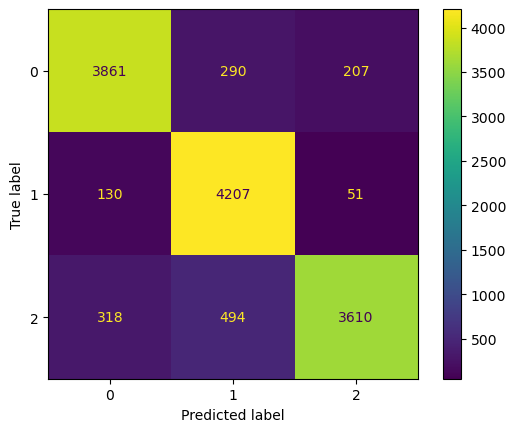

####################
####################
Fold 3
Epoch 1
-------------------------------
loss: 0.317352  [ 1024/52670]
Test Error: 
 Accuracy: 90.3%, Avg loss: 0.290110 

Epoch 2
-------------------------------
loss: 0.286932  [ 1024/52670]
Test Error: 
 Accuracy: 88.5%, Avg loss: 0.304435 

Epoch 3
-------------------------------
loss: 0.280051  [ 1024/52670]
Test Error: 
 Accuracy: 90.2%, Avg loss: 0.294543 

Epoch 4
-------------------------------
loss: 0.265966  [ 1024/52670]
Test Error: 
 Accuracy: 90.2%, Avg loss: 0.283090 

Epoch 5
-------------------------------
loss: 0.274457  [ 1024/52670]
Test Error: 
 Accuracy: 90.4%, Avg loss: 0.281161 

Epoch 6
-------------------------------
loss: 0.266283  [ 1024/52670]
Test Error: 
 Accuracy: 90.3%, Avg loss: 0.283906 

Epoch 7
-------------------------------
loss: 0.286597  [ 1024/52670]
Test Error: 
 Accuracy: 90.7%, Avg loss: 0.271606 

Epoch 8
-------------------------------
loss: 0.250175  [ 1024/52670]
Test Error: 
 Accuracy: 91.

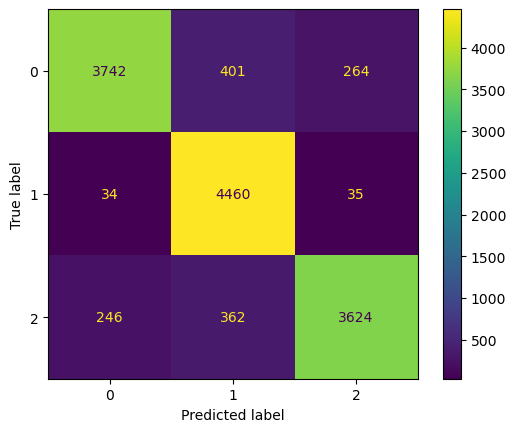

####################
####################
Fold 4
Epoch 1
-------------------------------
loss: 0.296125  [ 1024/52671]
Test Error: 
 Accuracy: 92.4%, Avg loss: 0.254452 

Epoch 2
-------------------------------
loss: 0.236008  [ 1024/52671]
Test Error: 
 Accuracy: 90.8%, Avg loss: 0.274511 

Epoch 3
-------------------------------
loss: 0.280067  [ 1024/52671]
Test Error: 
 Accuracy: 91.6%, Avg loss: 0.252830 

Epoch 4
-------------------------------
loss: 0.230545  [ 1024/52671]
Test Error: 
 Accuracy: 91.5%, Avg loss: 0.251983 

Epoch 5
-------------------------------
loss: 0.227569  [ 1024/52671]
Test Error: 
 Accuracy: 90.3%, Avg loss: 0.286218 

Epoch 6
-------------------------------
loss: 0.266308  [ 1024/52671]
Test Error: 
 Accuracy: 91.5%, Avg loss: 0.259053 

Epoch 7
-------------------------------
loss: 0.247169  [ 1024/52671]
Test Error: 
 Accuracy: 91.0%, Avg loss: 0.271441 

Epoch 8
-------------------------------
loss: 0.260071  [ 1024/52671]
Test Error: 
 Accuracy: 91.

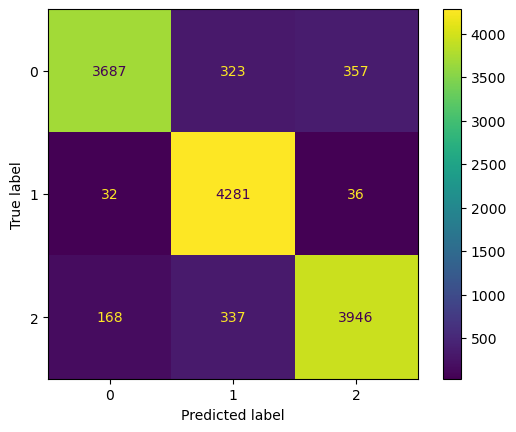

####################
####################
Fold 5
Epoch 1
-------------------------------
loss: 0.256865  [ 1024/52671]
Test Error: 
 Accuracy: 92.1%, Avg loss: 0.240065 

Epoch 2
-------------------------------
loss: 0.239687  [ 1024/52671]
Test Error: 
 Accuracy: 91.3%, Avg loss: 0.250271 

Epoch 3
-------------------------------
loss: 0.269156  [ 1024/52671]
Test Error: 
 Accuracy: 91.7%, Avg loss: 0.249255 

Epoch 4
-------------------------------
loss: 0.267080  [ 1024/52671]
Test Error: 
 Accuracy: 92.0%, Avg loss: 0.256012 

Epoch 5
-------------------------------
loss: 0.250256  [ 1024/52671]
Test Error: 
 Accuracy: 91.6%, Avg loss: 0.258540 

Epoch 6
-------------------------------
loss: 0.249889  [ 1024/52671]
Test Error: 
 Accuracy: 90.9%, Avg loss: 0.262705 

Epoch 7
-------------------------------
loss: 0.234367  [ 1024/52671]
Test Error: 
 Accuracy: 91.6%, Avg loss: 0.252684 

Epoch 8
-------------------------------
loss: 0.214989  [ 1024/52671]
Test Error: 
 Accuracy: 92.

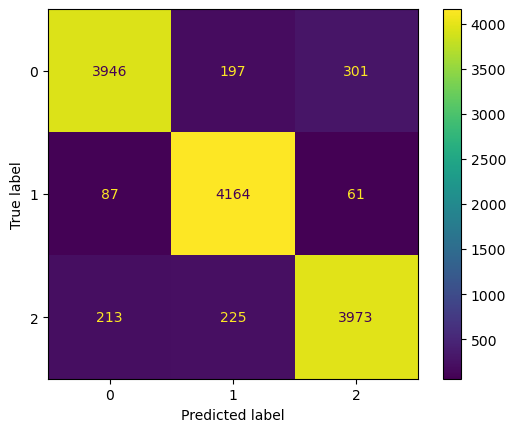

####################
####################
The average accuracy is 0.8948636468836956
####################
Accuracy: 0.8523514137334103
F1 score: 0.8523514137334103
Recall score: 0.8523514137334103
Precision score: 0.8523514137334103
zero value in validation set:  503


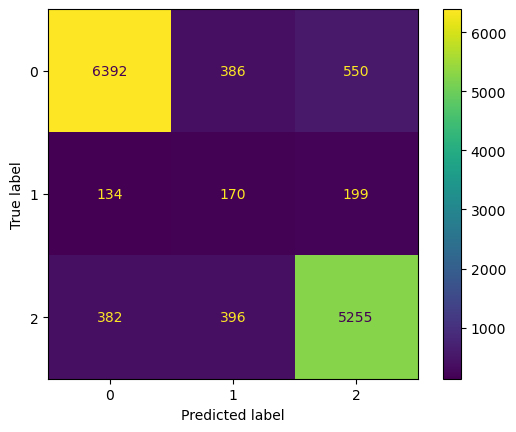

In [16]:
# K-fold cross validation for DNN
train_dataloader_list = []
val_dataloader_list = []
accuracy=[]
X_k_train_list, y_k_train_list, X_k_val_list, y_k_val_list = Kfold_split(X_train_scaled, y_train, Shuffle_state)
for i in range(len(X_k_train_list)):
    print("#"*20)
    print("Fold " + str(i+1))
    batch_size = 1024
    trainset_gpu = Data_tensor(X_k_train_list[i], y_k_train_list[i])
    valset_gpu = Data_tensor(X_k_val_list[i], y_k_val_list[i])
    train_dataloader = DataLoader(trainset_gpu, batch_size=batch_size, shuffle=True)
    val_dataloader = DataLoader(valset_gpu, batch_size=batch_size, shuffle=False)
    epochs =   10
    for t in range(epochs):
        print(f"Epoch {t+1}\n-------------------------------")
        train(train_dataloader, model, loss_fn, optimizer)
        test(val_dataloader, model, loss_fn)
    print("Done!")
    print(model)
    model.eval()
    pred = model(val_dataloader.dataset[:][0]).detach().cpu().max(axis=1).indices.numpy()
    # print(pred)
    true = val_dataloader.dataset[:][1].cpu().numpy()
    # print(true)
    #Performance metrics
    Accuracy_LR = accuracy_score(true, pred)
    F1_LR = accuracy_score(true, pred)
    Precision_LR = accuracy_score(true, pred)
    Recall_LR = accuracy_score(true, pred)
    accuracy.append(Accuracy_LR)
    print("Accuracy: " + str(Accuracy_LR))
    print("F1 score: " + str(F1_LR))
    print("Recall score: " + str(Recall_LR))
    print("Precision score: " + str(Precision_LR))
    print("zero value in validation set: ",sum(true==1))
    cm_2c = confusion_matrix(true, pred)
    cm_display_2c = ConfusionMatrixDisplay(cm_2c).plot()
    plt.show()
    print("#"*20)
print("#"*20)

print("The average accuracy is", np.mean(accuracy))
print("#"*20)


testset_gpu = Data_tensor(X_test_scaled, y_test)
test_dataloader = DataLoader(testset_gpu, batch_size=batch_size, shuffle=False)
model.eval()
pred = model(test_dataloader.dataset[:][0]).detach().cpu().max(axis=1).indices.numpy()
true = test_dataloader.dataset[:][1].cpu().numpy()
#Performance metrics
Accuracy_LR = accuracy_score(true, pred)
F1_LR = accuracy_score(true, pred)

Precision_LR = accuracy_score(true, pred)
Recall_LR = accuracy_score(true, pred)
print("Accuracy: " + str(Accuracy_LR))
print("F1 score: " + str(F1_LR))
print("Recall score: " + str(Recall_LR))
print("Precision score: " + str(Precision_LR))

print("zero value in validation set: ",sum(true==1))
cm_2c = confusion_matrix(true, pred)
cm_display_2c = ConfusionMatrixDisplay(cm_2c).plot()
plt.show()



[[626, 380], [443, 607, 259], [351, 366, 423], [476, 572, 616, 472]]
[0.0056, 0.0037, 0.0079, 0.0015, 0.0014]
['ReLU', 'PReLU', 'LeakyReLU', 'Sigmoid']
####################
Fold 1
####################
********************
hidden size:  [626, 380]
learning rate:  0.0056
activition layer:  ReLU
********************
Training Progress: 1 / 400
********************
DNN_rs(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=360, out_features=626, bias=True)
    (1): ReLU()
    (2): Linear(in_features=626, out_features=380, bias=True)
    (3): ReLU()
    (4): Linear(in_features=380, out_features=3, bias=True)
  )
)
Epoch 1
-------------------------------
loss: 0.182028  [ 1024/52670]
Test Error: 
 Accuracy: 93.1%, Avg loss: 0.221623 

Epoch 2
-------------------------------
loss: 0.186219  [ 1024/52670]
Test Error: 
 Accuracy: 93.2%, Avg loss: 0.218894 

Epoch 3
-------------------------------
loss: 0.187863  [ 1024/52670]
Test Error: 
 Accuracy: 92.5%, Avg loss: 0.234908 

Epoch 

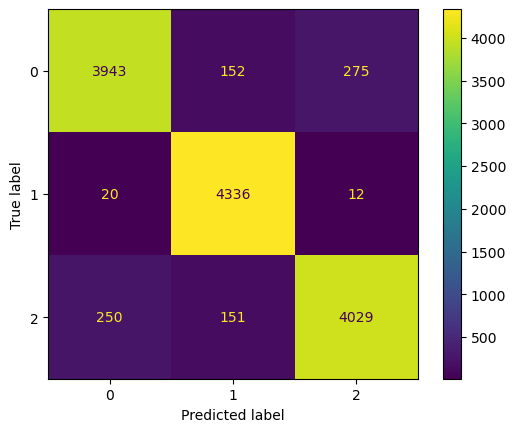

####################
####################
Fold 2
Epoch 1
-------------------------------
loss: 0.200990  [ 1024/52670]
Test Error: 
 Accuracy: 94.4%, Avg loss: 0.193444 

Epoch 2
-------------------------------
loss: 0.184756  [ 1024/52670]
Test Error: 
 Accuracy: 94.2%, Avg loss: 0.195047 

Epoch 3
-------------------------------
loss: 0.187304  [ 1024/52670]
Test Error: 
 Accuracy: 93.1%, Avg loss: 0.207959 

Epoch 4
-------------------------------
loss: 0.208009  [ 1024/52670]
Test Error: 
 Accuracy: 93.7%, Avg loss: 0.202860 

Epoch 5
-------------------------------
loss: 0.207500  [ 1024/52670]
Test Error: 
 Accuracy: 93.9%, Avg loss: 0.204648 

Epoch 6
-------------------------------
loss: 0.195490  [ 1024/52670]
Test Error: 
 Accuracy: 93.5%, Avg loss: 0.201420 

Epoch 7
-------------------------------
loss: 0.190719  [ 1024/52670]
Test Error: 
 Accuracy: 93.7%, Avg loss: 0.205249 

Epoch 8
-------------------------------
loss: 0.185911  [ 1024/52670]
Test Error: 
 Accuracy: 93.

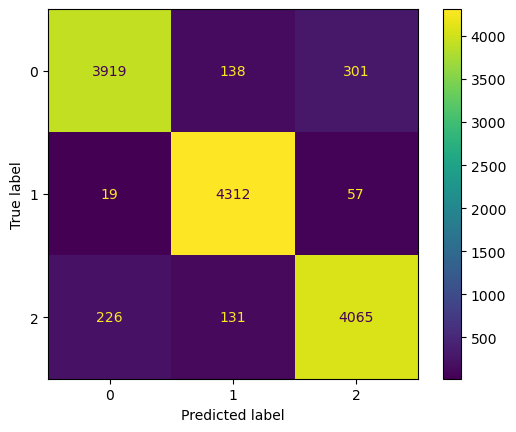

####################
####################
Fold 3
Epoch 1
-------------------------------
loss: 0.190119  [ 1024/52670]
Test Error: 
 Accuracy: 94.5%, Avg loss: 0.190804 

Epoch 2
-------------------------------
loss: 0.185528  [ 1024/52670]
Test Error: 
 Accuracy: 94.4%, Avg loss: 0.196194 

Epoch 3
-------------------------------
loss: 0.196229  [ 1024/52670]
Test Error: 
 Accuracy: 94.4%, Avg loss: 0.197964 

Epoch 4
-------------------------------
loss: 0.190430  [ 1024/52670]
Test Error: 
 Accuracy: 93.7%, Avg loss: 0.204133 

Epoch 5
-------------------------------
loss: 0.192811  [ 1024/52670]
Test Error: 
 Accuracy: 93.3%, Avg loss: 0.212258 

Epoch 6
-------------------------------
loss: 0.180354  [ 1024/52670]
Test Error: 
 Accuracy: 93.7%, Avg loss: 0.204782 

Epoch 7
-------------------------------
loss: 0.184182  [ 1024/52670]
Test Error: 
 Accuracy: 93.9%, Avg loss: 0.206860 

Epoch 8
-------------------------------
loss: 0.187819  [ 1024/52670]
Test Error: 
 Accuracy: 92.

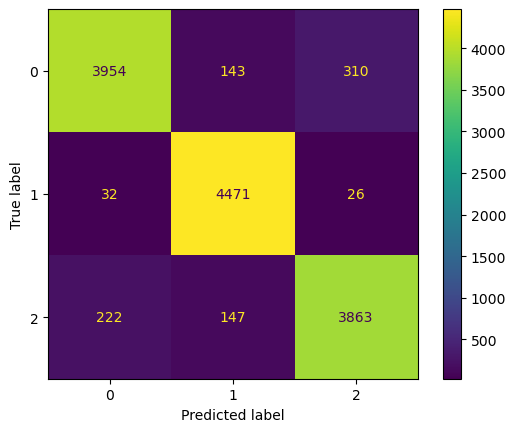

####################
####################
Fold 4
Epoch 1
-------------------------------
loss: 0.179435  [ 1024/52671]
Test Error: 
 Accuracy: 94.4%, Avg loss: 0.193954 

Epoch 2
-------------------------------
loss: 0.195052  [ 1024/52671]
Test Error: 
 Accuracy: 94.0%, Avg loss: 0.199087 

Epoch 3
-------------------------------
loss: 0.173099  [ 1024/52671]
Test Error: 
 Accuracy: 93.4%, Avg loss: 0.209055 

Epoch 4
-------------------------------
loss: 0.191846  [ 1024/52671]
Test Error: 
 Accuracy: 93.9%, Avg loss: 0.198412 

Epoch 5
-------------------------------
loss: 0.172703  [ 1024/52671]
Test Error: 
 Accuracy: 94.0%, Avg loss: 0.207057 

Epoch 6
-------------------------------
loss: 0.184426  [ 1024/52671]
Test Error: 
 Accuracy: 93.8%, Avg loss: 0.205148 

Epoch 7
-------------------------------
loss: 0.192348  [ 1024/52671]
Test Error: 
 Accuracy: 93.5%, Avg loss: 0.206043 

Epoch 8
-------------------------------
loss: 0.164109  [ 1024/52671]
Test Error: 
 Accuracy: 93.

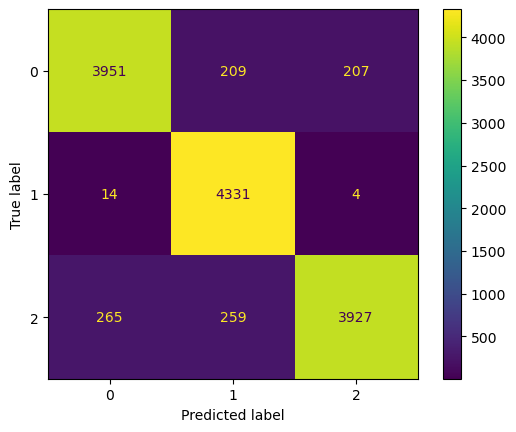

####################
####################
Fold 5
Epoch 1
-------------------------------
loss: 0.191713  [ 1024/52671]
Test Error: 
 Accuracy: 92.2%, Avg loss: 0.222435 

Epoch 2
-------------------------------
loss: 0.190846  [ 1024/52671]
Test Error: 
 Accuracy: 94.2%, Avg loss: 0.200255 

Epoch 3
-------------------------------
loss: 0.182377  [ 1024/52671]
Test Error: 
 Accuracy: 93.9%, Avg loss: 0.199215 

Epoch 4
-------------------------------
loss: 0.206905  [ 1024/52671]
Test Error: 
 Accuracy: 93.9%, Avg loss: 0.203446 

Epoch 5
-------------------------------
loss: 0.181600  [ 1024/52671]
Test Error: 
 Accuracy: 93.8%, Avg loss: 0.207677 

Epoch 6
-------------------------------
loss: 0.186599  [ 1024/52671]
Test Error: 
 Accuracy: 93.5%, Avg loss: 0.209355 

Epoch 7
-------------------------------
loss: 0.198552  [ 1024/52671]
Test Error: 
 Accuracy: 93.9%, Avg loss: 0.207503 

Epoch 8
-------------------------------
loss: 0.199906  [ 1024/52671]
Test Error: 
 Accuracy: 93.

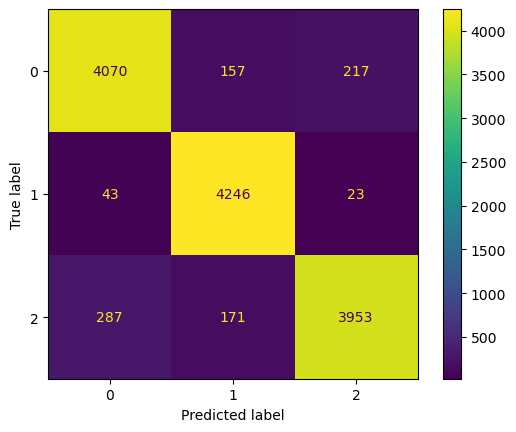

####################
####################
The best hidden layer size is [626, 380]
The best learning rate is 0.0056
The best activition layer is ReLU
The best average accuracy is 0.9380298003283551
####################
Accuracy: 0.8610790536641661
F1 score: 0.8610790536641661
Recall score: 0.8610790536641661
Precision score: 0.8610790536641661
zero value in validation set:  503


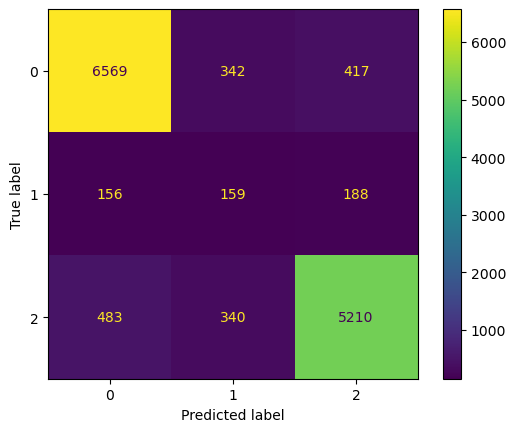

In [20]:
# Random search for DNN
min_width=256
max_width=640
min_depth=1
max_depth=5
hidden_layer_number=4

min_learning_rate=0.0001
max_learning_rate=0.01
learning_rate_number=5

activition_list=["ReLU", "PReLU", "LeakyReLU","Sigmoid"]

input_size=X.shape[1]
output_size=3

param_dist = {"hidden_sizes": [[randint(min_width,max_width).rvs() for i in range(randint(min_depth, max_depth).rvs())] for j in range(hidden_layer_number)], 
                                "alpha": [randint(int(min_learning_rate*10000),int(max_learning_rate*10000)).rvs()/10000  for j in range(learning_rate_number)], # L2 regularization
                                "activition": activition_list,
                            }

print(param_dist["hidden_sizes"])
print(param_dist["alpha"])
print(param_dist["activition"])

train_dataloader_list = []
val_dataloader_list = []

accuracy_list=[]

parameters_list=[]

progress=0

X_k_train_list, y_k_train_list, X_k_val_list, y_k_val_list = Kfold_split(X_train_scaled, y_train, Shuffle_state)   # K-fold cross validation for DNN
for i in range(len(X_k_train_list)):

    
    print("#"*20)
    print("Fold " + str(i+1))
    print("#"*20)

    batch_size = 1024
    trainset_gpu = Data_tensor(X_k_train_list[i], y_k_train_list[i])
    valset_gpu = Data_tensor(X_k_val_list[i], y_k_val_list[i])
    train_dataloader = DataLoader(trainset_gpu, batch_size=batch_size, shuffle=True)
    validation_dataloader = DataLoader(valset_gpu, batch_size=batch_size, shuffle=False)
    
    
    for i in range(hidden_layer_number):
        hidden_layer=param_dist['hidden_sizes'][i]
        for j in param_dist['alpha']:
            alpha=j
            for k in param_dist['activition']:
                progress+=1
                activition_layer=k
                print("*"*20)
                print("hidden size: ", hidden_layer)
                print("learning rate: ", alpha)
                print("activition layer: ", activition_layer)
                print("*"*20)
                print("Training Progress: "+ str(progress)+" / "+str(len(X_k_train_list)*hidden_layer_number*len(param_dist['alpha'])*len(param_dist['activition'])))
                print("*"*20)

                parameters_list.append([hidden_layer,alpha, activition_layer])
    
                optimizer_rs.lr = alpha
                model_rs = DNN_rs(input_size, hidden_layer, output_size, activition_layer).to(device)
                print(model_rs)

                epochs = 5
                for t in range(epochs):
                    print(f"Epoch {t+1}\n-------------------------------")
                    train(train_dataloader, model, loss_fn, optimizer)
                    test(validation_dataloader, model, loss_fn)
                print("Done!")

                model_rs.eval()
                pred = model(validation_dataloader.dataset[:][0]).detach().cpu().max(axis=1).indices.numpy()
                true = validation_dataloader.dataset[:][1].cpu().numpy()
                # Performance metrics
                Accuracy_LR = accuracy_score(true, pred)
                F1_LR = accuracy_score(true, pred)
                Precision_LR = accuracy_score(true, pred)
                Recall_LR = accuracy_score(true, pred)
                accuracy_list.append(Accuracy_LR)
                
                print("Accuracy: " + str(Accuracy_LR))
                print("F1 score: " + str(F1_LR))
                print("Recall score: " + str(Recall_LR))
                print("Precision score: " + str(Precision_LR))

# Find the maxmium average accuracy for each combination of hyperparameters
mean_accuracy_list=[]
paramaters_combinition=[]
combinition=[]
for i in range(len(parameters_list)):
    if i < hidden_layer_number* len(param_dist['alpha'])*len(param_dist['activition']):
        for j in  range(len(parameters_list)):
            if parameters_list[i]==parameters_list[j]:
                combinition.append(j)

        accuracy_combinition=[]
        for k in combinition:
            accuracy_combinition.append(accuracy_list[k])
        
        mean_accuracy=np.mean(accuracy_combinition)
        mean_accuracy_list.append(mean_accuracy)
        paramaters_combinition.append(parameters_list[i])

hidden_layer=paramaters_combinition[mean_accuracy_list.index(max(mean_accuracy_list))][0]
alpha=paramaters_combinition[mean_accuracy_list.index(max(mean_accuracy_list))][1]
activition_layer=paramaters_combinition[mean_accuracy_list.index(max(mean_accuracy_list))][2]



#Show the coonfusion matrix for the best hyperparameters
print("#"*20)
print("Confusion matrix for the best hyperparameters in each fold")
print("#"*20)
print("hidden size: ", hidden_layer)
print("learning rate: ", alpha)
print("activition layer: ", activition_layer)

optimizer_rs.lr = alpha
model_rs = DNN_rs(input_size, hidden_layer, output_size, activition_layer).to(device)
print(model_rs)

for i in range(len(X_k_train_list)):

    print("#"*20)
    print("Fold " + str(i+1))
    batch_size = 1024
    trainset_gpu = Data_tensor(X_k_train_list[i], y_k_train_list[i])
    valset_gpu = Data_tensor(X_k_val_list[i], y_k_val_list[i])
    train_dataloader = DataLoader(trainset_gpu, batch_size=batch_size, shuffle=True)
    validation_dataloader = DataLoader(valset_gpu, batch_size=batch_size, shuffle=False)
    epochs = 10
    for t in range(epochs):
        print(f"Epoch {t+1}\n-------------------------------")
        train(train_dataloader, model, loss_fn, optimizer)
        test(validation_dataloader, model, loss_fn)
    print("Done!")

    model_rs.eval()
    pred = model(validation_dataloader.dataset[:][0]).detach().cpu().max(axis=1).indices.numpy()
    true = validation_dataloader.dataset[:][1].cpu().numpy()

    #Performance metrics
    Accuracy_LR = accuracy_score(true, pred)
    F1_LR = accuracy_score(true, pred)
    Precision_LR = accuracy_score(true, pred)
    Recall_LR = accuracy_score(true, pred)

    print("Accuracy: " + str(Accuracy_LR))
    print("F1 score: " + str(F1_LR))
    print("Recall score: " + str(Recall_LR))
    print("Precision score: " + str(Precision_LR))


    print("one value in validation set: ",sum(true==2))
    print("zero value in validation set: ",sum(true==1))
    print("negative one value in validation set: ",sum(true==0))

    cm_2c = confusion_matrix(true, pred)
    cm_display_2c = ConfusionMatrixDisplay(cm_2c).plot()
    plt.show()
    print("#"*20)


#Display the best hyperparameters and the corresponding average accuracy
print("#"*20)
print("The best hidden layer size is", hidden_layer)
print("The best learning rate is", alpha)
print("The best activition layer is", activition_layer)
print("The best average accuracy is", max(mean_accuracy_list))
print("#"*20)


#evaluation on test set
optimizer_rs.lr = alpha
model_rs = DNN_rs(input_size, hidden_layer, output_size, activition_layer).to(device)

testset_gpu = Data_tensor(X_test_scaled, y_test)
test_dataloader = DataLoader(testset_gpu, batch_size=batch_size, shuffle=False)
model_rs.eval()
pred = model(test_dataloader.dataset[:][0]).detach().cpu().max(axis=1).indices.numpy()
true = test_dataloader.dataset[:][1].cpu().numpy()
#Performance metrics
Accuracy_LR = accuracy_score(true, pred)
F1_LR = accuracy_score(true, pred)

Precision_LR = accuracy_score(true, pred)
Recall_LR = accuracy_score(true, pred)
print("Accuracy: " + str(Accuracy_LR))
print("F1 score: " + str(F1_LR))
print("Recall score: " + str(Recall_LR))
print("Precision score: " + str(Precision_LR))

print("zero value in validation set: ",sum(true==1))
cm_2c = confusion_matrix(true, pred)
cm_display_2c = ConfusionMatrixDisplay(cm_2c).plot()
plt.show()


In [ ]:
model.eval()
pred = model(test_dataloader.dataset[:][0]).detach().cpu().max(axis=1).indices.numpy()
true = test_dataloader.dataset[:][1].cpu().numpy()

In [ ]:
#Performance metrics
Accuracy_LR = accuracy_score(true, pred)
F1_LR = accuracy_score(true, pred)
Precision_LR = accuracy_score(true, pred)
Recall_LR = accuracy_score(true, pred)
print("Accuracy: " + str(Accuracy_LR))
print("F1 score: " + str(F1_LR))
print("Recall score: " + str(Recall_LR))
print("Precision score: " + str(Precision_LR))

Accuracy: 0.8392960184650894
F1 score: 0.8392960184650894
Recall score: 0.8392960184650894
Precision score: 0.8392960184650894


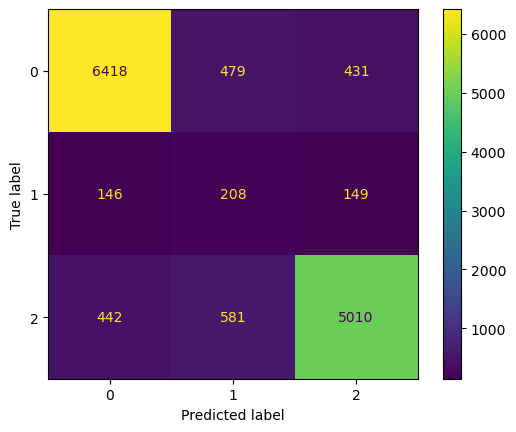

In [ ]:
#Confusion Matrix
cm_2c = confusion_matrix(true, pred)
cm_display_2c = ConfusionMatrixDisplay(cm_2c).plot()
plt.show()

In [ ]:
print(sum(y_test==1))
print(sum(y_test==-1))
print(sum(y_test==0))


6033
7328
503


## 4. Clustering


In [42]:
def pca_process(data,n_components):

    pca =  PCA(n_components=n_components)
    pca.fit(data)
    x_pca =pca.transform(data)
    return x_pca     

In [106]:
x_pca=0
x_pca=pca_process(X,2)
x_pca_patient_list=[0]*len(patient_id_unique)
print(x_pca.shape)
for i in range(len(patient_id_unique)):
    cut_list=[]
    for j in range(len(patient_id)):
        if patient_id[j]==patient_id_unique[i]:
            cut_list=np.append(cut_list,j)
    x_pca_patient_list[i]=x_pca[np.int32(cut_list[0]):np.int32(cut_list[-1]+1)]


(55456, 2)
(522, 2)


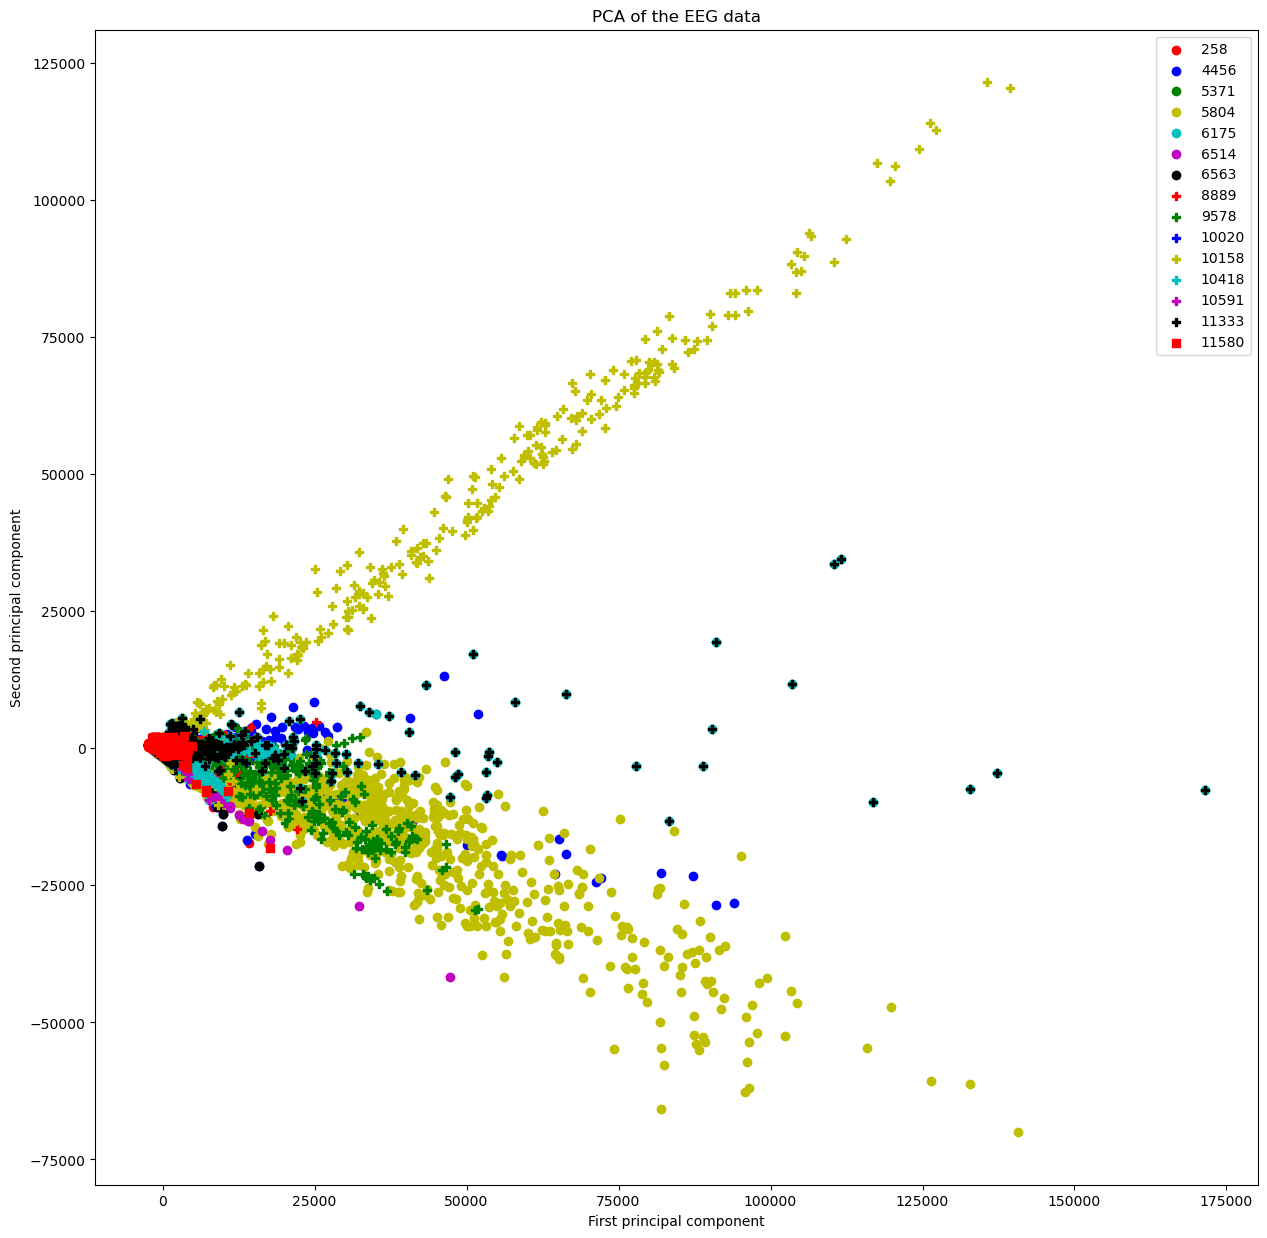

In [113]:
plt.figure(figsize=(15,15))

sca1 = plt.scatter(x_pca_patient_list[0][:,0],x_pca_patient_list[0][:,1],c='r')
sca2 = plt.scatter(x_pca_patient_list[1][:,0],x_pca_patient_list[1][:,1],c='b')
sca3 = plt.scatter(x_pca_patient_list[2][:,0],x_pca_patient_list[2][:,1],c='g')
sca4 = plt.scatter(x_pca_patient_list[3][:,0],x_pca_patient_list[3][:,1],c='y')
sca5 = plt.scatter(x_pca_patient_list[4][:,0],x_pca_patient_list[4][:,1],c='c')
sca6 = plt.scatter(x_pca_patient_list[5][:,0],x_pca_patient_list[5][:,1],c='m')
sca7 = plt.scatter(x_pca_patient_list[6][:,0],x_pca_patient_list[6][:,1],c='k')
sca8 = plt.scatter(x_pca_patient_list[7][:,0],x_pca_patient_list[7][:,1],c='r',marker='P')
sca9 = plt.scatter(x_pca_patient_list[8][:,0],x_pca_patient_list[8][:,1],c='g',marker='P')
sca10 = plt.scatter(x_pca_patient_list[9][:,0],x_pca_patient_list[9][:,1],c='b',marker='P')
sca11 = plt.scatter(x_pca_patient_list[10][:,0],x_pca_patient_list[10][:,1],c='y',marker='P')
sca12 = plt.scatter(x_pca_patient_list[11][:,0],x_pca_patient_list[11][:,1],c='c',marker='P')
sca13 = plt.scatter(x_pca_patient_list[12][:,0],x_pca_patient_list[12][:,1],c='m',marker='P')
sca14 = plt.scatter(x_pca_patient_list[13][:,0],x_pca_patient_list[13][:,1],c='k',marker='P')
sca15 = plt.scatter(x_pca_patient_list[14][:,0],x_pca_patient_list[14][:,1],c='r',marker='s')


plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.title("PCA of the EEG data")
plt.legend((sca1,sca2,sca3,sca4,sca5,sca6,sca7,sca8,sca9,sca10,sca11,sca12,sca13,sca14,sca15),patient_id_unique)
plt.show()

C:\Users\skyho\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[5 5 5 ... 5 5 5]


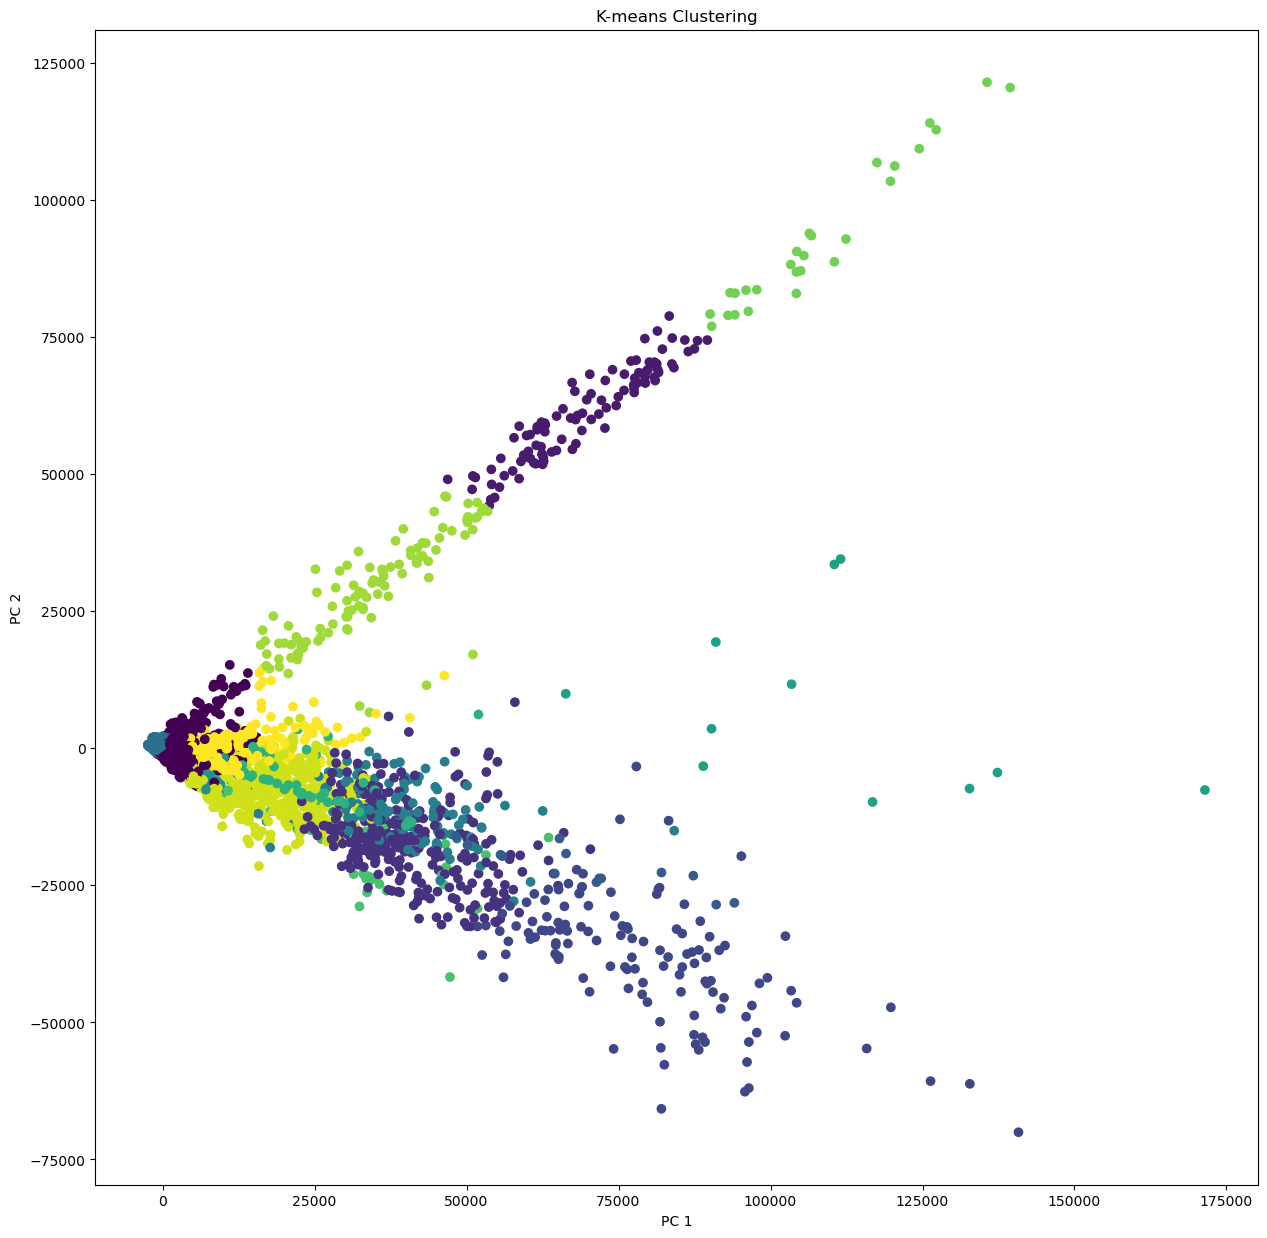

In [117]:

# perform k-means clustering
kmeans = KMeans(n_clusters=15, random_state=0).fit(X)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

print(labels)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.figure(figsize=(15,15))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
# plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('K-means Clustering')
# plt.legend()
plt.show()


## 5. Model Evaluation